In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)  # 展示所有列

file = 'data.csv'
raw_data = pd.read_csv(file)
raw_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
# 创建数据副本
data = raw_data.copy()

# 修改Attrition列，离职的设为1，否则为0
data.loc[data["Attrition"] == "Yes", "Attrition"] = 1
data.loc[data["Attrition"] == "No", "Attrition"] = 0

# 修改BusinessTravel列，分为三档0,1,2
data.loc[data["BusinessTravel"] == "Non-Travel", "BusinessTravel"] = 0
data.loc[data["BusinessTravel"] == "Travel_Rarely", "BusinessTravel"] = 1
data.loc[data["BusinessTravel"] == "Travel_Frequently", "BusinessTravel"] = 2

# 修改Gender列，男性设为1，女性为0
data.loc[data["Gender"] == "Male", "Gender"] = 1
data.loc[data["Gender"] == "Female", "Gender"] = 0

# 修改OverTime列，yes设为1，no设为0
data.loc[data["OverTime"] == "Yes", "OverTime"] = 1
data.loc[data["OverTime"] == "No", "OverTime"] = 0

# 删除Over18、EmployeeCount和StandardHours列，因为每列只有一个值
data = data.drop(["Over18", "EmployeeCount", "StandardHours"], axis=1)

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [4]:
(data['MonthlyIncome'] / data['MonthlyRate']).mean()

0.669178951732036

In [5]:
data = data.infer_objects()  # 自动修正每列数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   int64 
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

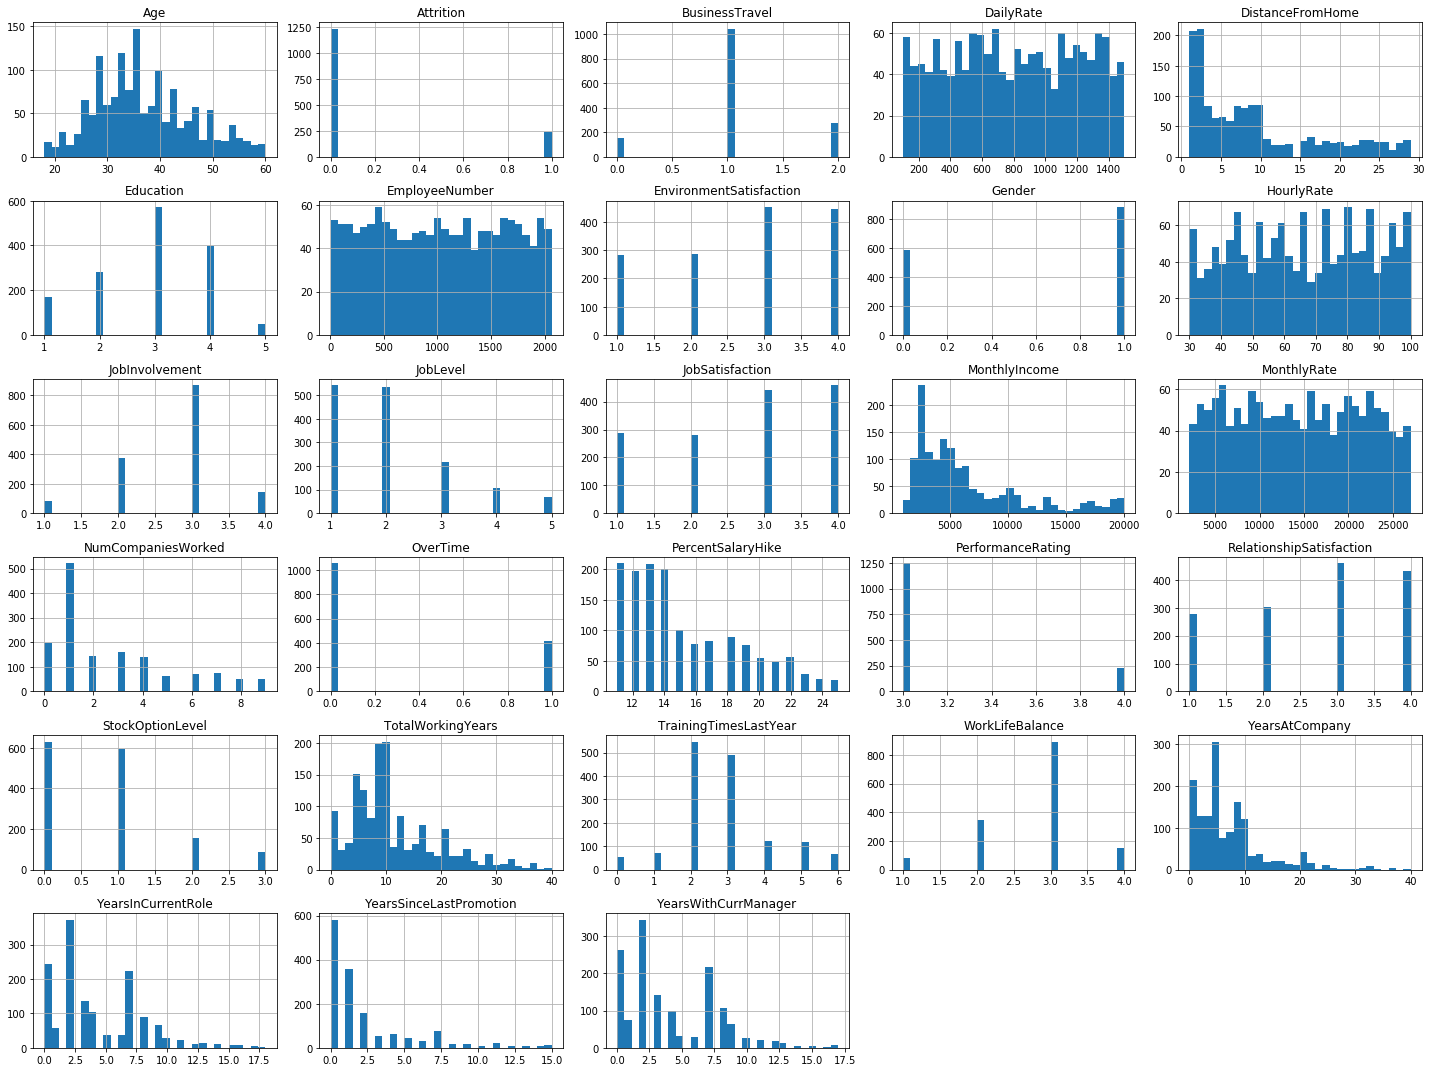

In [6]:
data.hist(bins=30, figsize=(20,15))
plt.tight_layout();

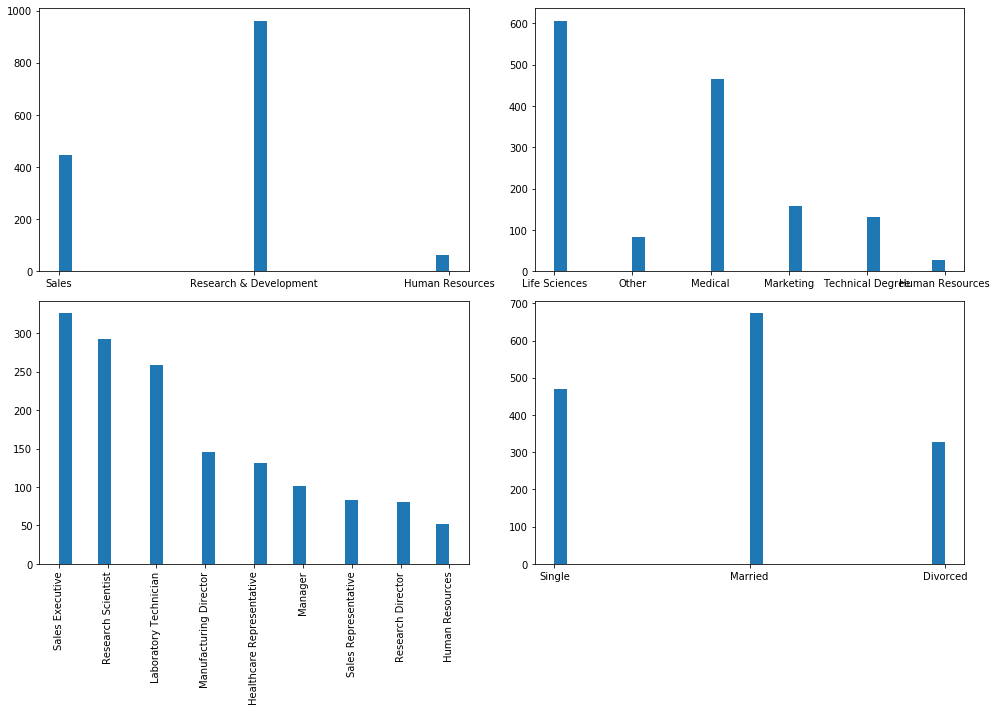

In [7]:
# 查看类别变量分布
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1) 
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.hist(data['Department'], bins=30)
ax2.hist(data['EducationField'], bins=30)
ax3.hist(data['JobRole'], bins=30)
ax4.hist(data['MaritalStatus'], bins=30);

for tick in ax3.get_xticklabels():  # 横坐标倾斜
    tick.set_rotation(90)
    
plt.tight_layout()

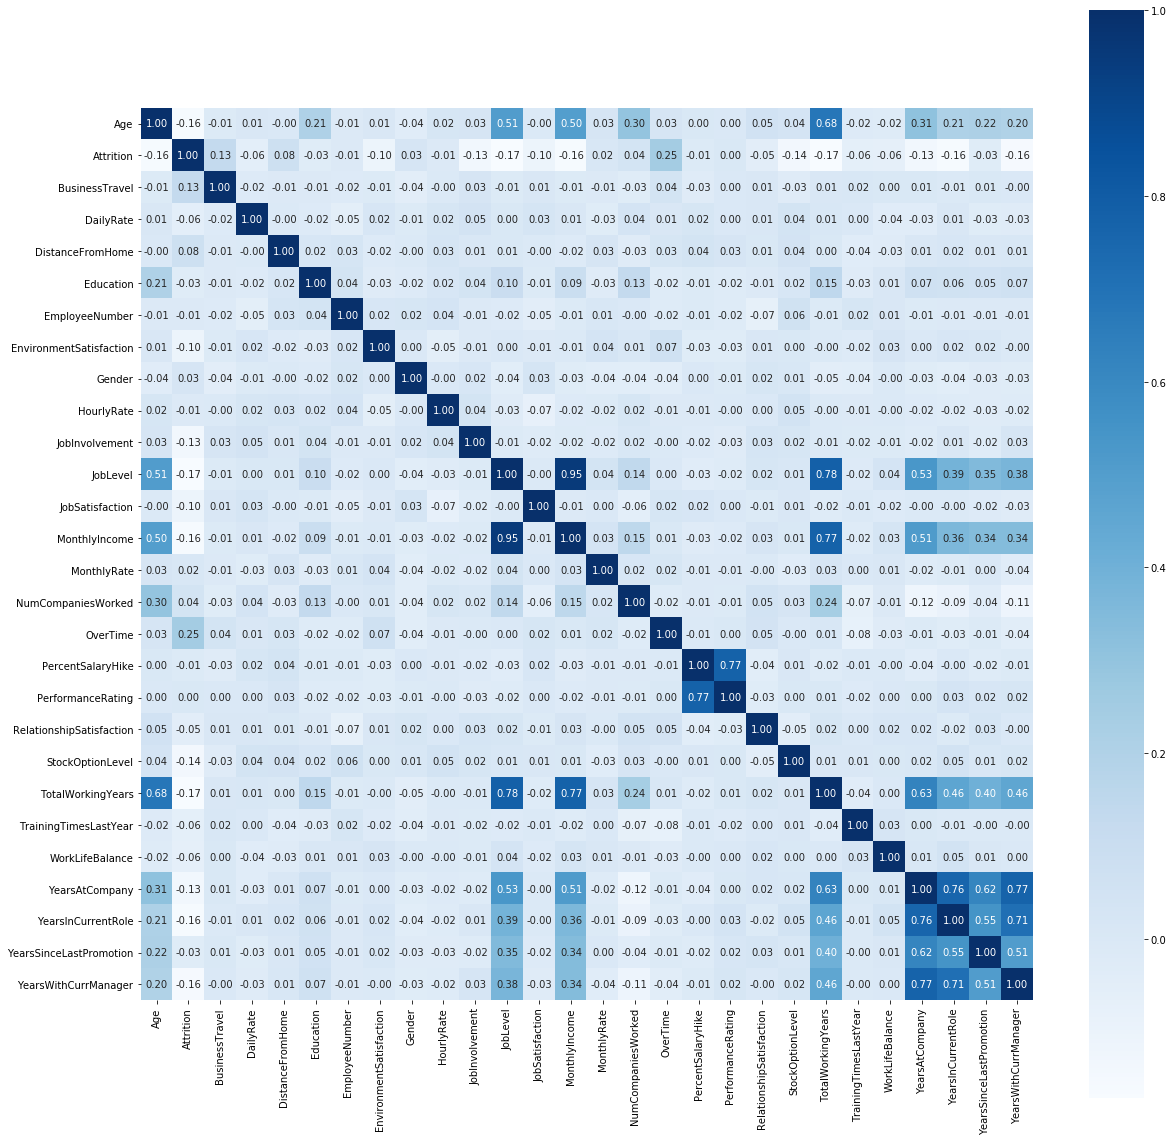

In [8]:
import seaborn as sns
plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, vmax=1, square=True, cmap="Blues", fmt='.2f')
plt.show()

目前观察到的东西，在此记录：
- 作为label，`Attrition`的比例比较失调
- `PerformanceRating`理论上有四档，但是数据中只有最后两档（3和4）出现了
- 一些带rate的列的实际意义不太懂（`DailyRate`, `HourlyRate`, `MonthlyRate`, `MonthlyIncome`）
- 受教育专业（`EducationField`）、工作职位（`JobRole`）、工作部门（`Department`）之间可能存在联系，或许可以把它们组合起来
- 如何处理类别类的feature，可能是接下来可以操作的方向（one-hot）
- 从相关性图来看，基本没有feature与离职有显著线性关系。`JobLevel`与`MonthlyIncome`和`TotalWorkingYears`有显著关系；`PerformanceRating`与`MonthlyIncome`有显著关系；还有其他trivial的显著关系
- SMOTE插值
- 采样之后再分析
- 改用XGBoost，衡量importance
- 衡量importance 多次，画图

In [8]:
# 将类别变量one hot之后加入dataframe，得到data_with_one_hot
category_columns = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
data_with_one_hot = data.join(pd.get_dummies(data[category_columns]))
data_with_one_hot = data_with_one_hot.drop(columns=category_columns)  # 删除原来的类别变量列
data_with_one_hot

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,2,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,4,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,5,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,7,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,2061,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,1,613,6,1,2062,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,1,155,4,3,2064,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,1023,2,3,2065,4,1,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [9]:
# 查看类别变量与Attrition之间的相关系数
pd.DataFrame(data['Attrition']).join(pd.get_dummies(data[category_columns])).corr()
# 可以看出没什么相关

,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Attrition,1.000000,0.016832,-0.085293,0.080855,0.036466,-0.032703,0.055781,-0.046999,-0.017898,0.069355,-0.078696,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
Department_Human Resources,0.016832,1.000000,-0.290754,-0.139650,0.646436,-0.068040,-0.073692,-0.049761,-0.007527,-0.019469,-0.066186,0.904983,-0.097859,0.087615,-0.070000,-0.050765,-0.105352,-0.112959,-0.051764,0.016037,0.034767,-0.051443
Department_Research & Development,-0.085293,-0.290754,1.000000,-0.906818,-0.187954,0.127321,-0.478520,0.183548,0.064751,0.038541,0.227637,-0.263128,0.336570,-0.071356,0.240754,0.174596,0.362340,-0.733497,-0.336127,0.035158,-0.019997,-0.009990
Department_Sales,0.080855,-0.139650,-0.906818,1.000000,-0.090275,-0.101791,0.527691,-0.168034,-0.063695,-0.031309,-0.206425,-0.126381,-0.305208,0.035248,-0.218320,-0.158327,-0.328576,0.808869,0.370667,-0.043451,0.005378,0.033002
EducationField_Human Resources,0.036466,0.646436,-0.187954,-0.090275,1.000000,-0.114559,-0.047637,-0.092899,-0.033248,-0.042964,-0.042785,0.549751,-0.063260,0.082271,-0.045251,-0.032816,-0.068103,-0.073020,-0.033462,0.012107,0.057339,-0.072051
EducationField_Life Sciences,-0.032703,-0.068040,0.127321,-0.101791,-0.114559,1.000000,-0.291660,-0.568774,-0.203560,-0.263050,0.029084,-0.063119,0.044359,-0.011143,0.052023,0.018401,0.043729,-0.091122,-0.043208,-0.002672,-0.017866,0.021469
EducationField_Marketing,0.055781,-0.073692,-0.478520,0.527691,-0.047637,-0.291660,1.000000,-0.236514,-0.084647,-0.109385,-0.108929,-0.066690,-0.161055,0.025577,-0.115206,-0.083548,-0.173387,0.457308,0.133065,-0.007212,0.018491,-0.013323
EducationField_Medical,-0.046999,-0.049761,0.183548,-0.168034,-0.092899,-0.568774,-0.236514,1.000000,-0.165072,-0.213314,0.034165,-0.042895,0.066262,-0.001128,0.035496,0.062898,0.039735,-0.133532,-0.051990,0.013316,-0.007139,-0.004249
EducationField_Other,-0.017898,-0.007527,0.064751,-0.063695,-0.033248,-0.203560,-0.084647,-0.165072,1.000000,-0.076343,0.017609,0.001594,0.058759,-0.008046,-0.010820,-0.006044,0.005286,-0.036995,-0.033774,0.005411,-0.009171,0.004972
EducationField_Technical Degree,0.069355,-0.019469,0.038541,-0.031309,-0.042964,-0.263050,-0.109385,-0.213314,-0.076343,1.000000,0.018681,-0.008623,-0.026589,-0.038946,0.007817,-0.022905,0.076218,-0.058843,0.057185,-0.019243,0.002710,0.014265


-0.1982103579924051


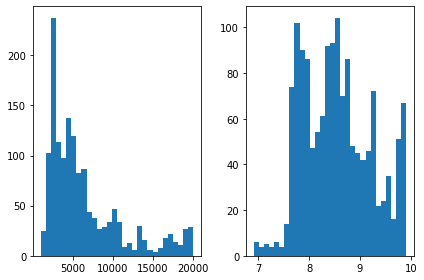

In [10]:
# 可以对MonthlyIncome做对数变换
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data['MonthlyIncome'], bins=30)
ax2.hist(np.log(data['MonthlyIncome']), bins=30)
plt.tight_layout()

# Attrition 与 对数后的MonthlyIncome的相关系数有极其微小的提高
print(np.corrcoef(np.log(data['MonthlyIncome']), data['Attrition'])[0,1])

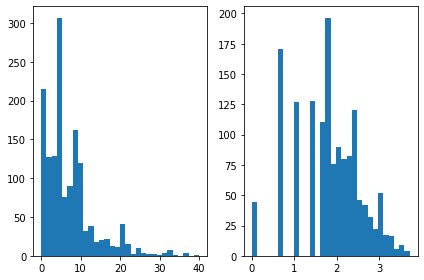

In [11]:
# 可以对MonthlyIncome做对数变换
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data['YearsAtCompany'], bins=30)
ax2.hist(np.log(data['YearsAtCompany'] + 1), bins=30)
plt.tight_layout()

In [33]:
# 随机森林估计feature重要性
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(data_with_one_hot.drop(columns=["Attrition"]), data_with_one_hot["Attrition"])
sorted(zip(rf_model.feature_importances_, data_with_one_hot.columns), reverse=True)

[(0.06769980712527036, 'JobSatisfaction'),
 (0.05633422756902776, 'Age'),
 (0.05092585661093789, 'BusinessTravel'),
 (0.05044086364121915, 'NumCompaniesWorked'),
 (0.047491293783883705, 'Education'),
 (0.04630096800140135, 'StockOptionLevel'),
 (0.04500545950473467, 'MonthlyIncome'),
 (0.04396752944346472, 'Gender'),
 (0.04394925554696, 'DailyRate'),
 (0.04304496737410119, 'WorkLifeBalance'),
 (0.03218592122901153, 'OverTime'),
 (0.02881081391853085, 'MonthlyRate'),
 (0.028631944594527434, 'YearsSinceLastPromotion'),
 (0.02646632499845545, 'EmployeeNumber'),
 (0.026119809118315525, 'YearsAtCompany'),
 (0.025916461969707254, 'TotalWorkingYears'),
 (0.02582961970908808, 'RelationshipSatisfaction'),
 (0.024270185709421042, 'HourlyRate'),
 (0.023523149523319607, 'JobInvolvement'),
 (0.023233024749094784, 'YearsInCurrentRole'),
 (0.023125826753299873, 'JobLevel'),
 (0.022806832639674545, 'TrainingTimesLastYear'),
 (0.020999428297597458, 'PerformanceRating'),
 (0.01957235756393977, 'Distance

In [42]:
# SMOTE上采样之后再用随机森林估计feature重要性
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
feature, label = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

rf_model = RandomForestClassifier()
rf_model.fit(feature, label)
sorted(zip(rf_model.feature_importances_, data.columns), reverse=True)

[(0.0607777079526011, 'NumCompaniesWorked'),
 (0.05000850568669161, 'HourlyRate'),
 (0.04844673558020865, 'JobInvolvement'),
 (0.037518581621211786, 'EnvironmentSatisfaction'),
 (0.034445507600441023, 'OverTime'),
 (0.033764834628161905, 'YearsAtCompany'),
 (0.033385363586226235, 'JobLevel'),
 (0.03322043959235369, 'Gender'),
 (0.03320848264589702, 'Education'),
 (0.03303654692130129, 'EmployeeNumber'),
 (0.03252563382478341, 'DistanceFromHome'),
 (0.030289172160146437, 'StockOptionLevel'),
 (0.03013498777309573, 'BusinessTravel'),
 (0.029934242847146905, 'RelationshipSatisfaction'),
 (0.0297563531969469, 'Age'),
 (0.029726734343186526, 'TrainingTimesLastYear'),
 (0.028205933266499977, 'DailyRate'),
 (0.027400390987140637, 'MonthlyRate'),
 (0.024613493199569254, 'YearsWithCurrManager'),
 (0.02230544383478216, 'PercentSalaryHike'),
 (0.020992812964861426, 'PerformanceRating'),
 (0.019146574322422307, 'MaritalStatus'),
 (0.017840358550205708, 'Department'),
 (0.017164713780788727, 'JobRo

In [46]:
# GradientBoosting估计feature重要性
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(data_with_one_hot.drop(columns=["Attrition"]), data_with_one_hot["Attrition"])
sorted(zip(gb_model.feature_importances_, data_with_one_hot.columns), reverse=True)

[(0.12178945103754474, 'JobSatisfaction'),
 (0.11462554001564657, 'NumCompaniesWorked'),
 (0.07422660688382098, 'Age'),
 (0.04850136919765242, 'StockOptionLevel'),
 (0.0472647989830919, 'RelationshipSatisfaction'),
 (0.04562203120894331, 'EmployeeNumber'),
 (0.04007110093300335, 'DailyRate'),
 (0.03834891531289655, 'HourlyRate'),
 (0.03423800361091173, 'JobInvolvement'),
 (0.033379178953796995, 'BusinessTravel'),
 (0.03280317279295304, 'Education'),
 (0.0304582892052726, 'MonthlyRate'),
 (0.029835055452017742, 'JobRole_Research Scientist'),
 (0.029157552172915383, 'YearsSinceLastPromotion'),
 (0.027672283976856168, 'JobLevel'),
 (0.026243604365450757, 'Attrition'),
 (0.025873086630233067, 'MonthlyIncome'),
 (0.025255203050750095, 'WorkLifeBalance'),
 (0.02414936023327123, 'Gender'),
 (0.023107112749084075, 'TrainingTimesLastYear'),
 (0.01767932250128804, 'YearsInCurrentRole'),
 (0.013756594846602332, 'TotalWorkingYears'),
 (0.012333180455785938, 'MaritalStatus_Married'),
 (0.0120221341

In [ ]:
# SMOTE上采样之后再用随机森林估计feature重要性
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
feature, label = oversampler.fit_resample(data_with_one_hot.drop(columns=["Attrition"]), data["Attrition"])

rf_model = RandomForestClassifier()
rf_model.fit(feature, label)
sorted(zip(rf_model.feature_importances_, data.columns), reverse=True)

## 可视化部分

In [219]:
#!pip install kaleido

In [9]:
import kaleido

In [12]:
# 受教育程度与收入的关系
#!pip install plotly==4.14.3
import plotly.express as px

df = data[["Education","MonthlyIncome"]]
df.loc[df["Education"] == 1, "Education"] = "Below College"
df.loc[df["Education"] == 2, "Education"] = "College"
df.loc[df["Education"] == 3, "Education"] = "Bachelor"
df.loc[df["Education"] == 4, "Education"] = "Master"
df.loc[df["Education"] == 5, "Education"] = "Doctor"

fig = px.box(df, x="Education", y="MonthlyIncome")
#fig = px.box(data, x="Education", y="MonthlyIncome", points="all")
fig.show()

#fig.write_image("fig2.png", engine="kaleido")

E:\GAME\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# 不同部门受教育情况，这部分箱型图看不出差距
#!pip install plotly==4.14.3
import plotly.express as px

df = data[["Education","Department"]]

fig = px.box(df, x="Department", y="Education")
fig.show()

In [112]:
# 不同部门受教育情况，柱状图
import plotly.graph_objects as go

df = data[["Education","Department"]]
df.loc[df["Education"] == 1, "Education"] = "Below College"
df.loc[df["Education"] == 2, "Education"] = "College"
df.loc[df["Education"] == 3, "Education"] = "Bachelor"
df.loc[df["Education"] == 4, "Education"] = "Master"
df.loc[df["Education"] == 5, "Education"] = "Doctor"

x=["Research & Development", "Sales", "Human Resources"]

fig = go.Figure(go.Bar(x=x, y=list(df[df["Education"] == "Below College"].loc[:,'Department'].value_counts().values), name='Below College'))
fig.add_trace(go.Bar(x=x, y=list(df[df["Education"] == "College"].loc[:,'Department'].value_counts().values), name='College'))
fig.add_trace(go.Bar(x=x, y=list(df[df["Education"] == "Bachelor"].loc[:,'Department'].value_counts().values), name='Bachelor'))
fig.add_trace(go.Bar(x=x, y=list(df[df["Education"] == "Master"].loc[:,'Department'].value_counts().values), name='Master'))
fig.add_trace(go.Bar(x=x, y=list(df[df["Education"] == "Doctor"].loc[:,'Department'].value_counts().values), name='Doctor'))

fig.update_layout(barmode='stack',yaxis=dict(title='Count'))
fig.show()

E:\GAME\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

E:\GAME\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

E:\GAME\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

E:\GAME\Anaconda3\lib\site-packages\ipykernel_launche

In [113]:
# 不同部门受教育情况，另一种柱状图
import plotly.graph_objects as go
df = data[["Education","Department"]]
df.loc[df["Education"] == 1, "Education"] = "Below College"
df.loc[df["Education"] == 2, "Education"] = "College"
df.loc[df["Education"] == 3, "Education"] = "Bachelor"
df.loc[df["Education"] == 4, "Education"] = "Master"
df.loc[df["Education"] == 5, "Education"] = "Doctor"

x=["Research & Development", "Sales", "Human Resources"]

fig = go.Figure(data=[
    go.Bar(name='Below College', x=x, y=list(df[df["Education"] == "Below College"].loc[:,'Department'].value_counts().values)),
    go.Bar(name='College', x=x, y=list(df[df["Education"] == "College"].loc[:,'Department'].value_counts().values)),
    go.Bar(name='Bachelor', x=x, y=list(df[df["Education"] == "Bachelor"].loc[:,'Department'].value_counts().values)),
    go.Bar(name='Master', x=x, y=list(df[df["Education"] == "Master"].loc[:,'Department'].value_counts().values)),
    go.Bar(name='Doctor', x=x, y=list(df[df["Education"] == "Doctor"].loc[:,'Department'].value_counts().values))
])

# Change the bar mode
fig.update_layout(barmode='group',yaxis=dict(title='Count'))
fig.show()

E:\GAME\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

E:\GAME\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

E:\GAME\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

E:\GAME\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on 

In [132]:
# 同一工作角色，男性女性月收入比较
import plotly.graph_objects as go
x = ["Healthcare Representative", "Human Resources", "Laboratory Technician", "Manager", "Manufacturing Director", "Research Director", "Research Scientist","Sales Representative"]
fig = go.Figure(data=[
    go.Bar(name='Male', x=x, y=list(data[data["Gender"] == 1].groupby("JobRole").agg('mean')["MonthlyIncome"].values)),
    go.Bar(name='Female', x=x, y=list(data[data["Gender"] == 0].groupby("JobRole").agg('mean')["MonthlyIncome"].values))
])
# Change the bar mode
fig.update_layout(barmode='group',yaxis=dict(title='Average Monthly Income'))
fig.show()

In [186]:
# 离职情况与年龄分布的直方图
fig = px.histogram(data, x="Age", color="Attrition")

fig.show()

In [210]:
# # 离职情况与年龄分布的箱型图
df = data[["Attrition","Age"]]
df.loc[df["Attrition"] == 1, "Attrition"] = "Yes_Attrition"
df.loc[df["Attrition"] == 0, "Attrition"] = "No_Attrition"

fig = px.box(df, x="Attrition", y="Age")
fig.show()

E:\GAME\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [215]:
# 各工作的离职率
tmp3 = pd.DataFrame(pd.crosstab(data["JobRole"],data['Attrition']), )
tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

fig = px.bar(x=tmp3.index, y=tmp3['Attr%'], labels={'x':'Job Role', 'y':'Attrition Rate(%)'})
fig.show()
